This project aims to predict customer churn using machine learning. We'll explore the dataset, preprocess the data, and build predictive models to identify churn patterns.


In [81]:
# Importing essential libraries
import numpy as np                # For numerical operations
import pandas as pd               # For data manipulation and analysis
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns           
  # For advanced visualizations

# For preprocessing and feature selection
from sklearn.model_selection import train_test_split   # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler       # To standardize features
from sklearn.preprocessing import LabelEncoder         # For encoding categorical data

# For model building
from sklearn.ensemble import RandomForestClassifier    # Example model
from sklearn.linear_model import LogisticRegression    # Example model
from sklearn.svm import SVC                            # Support Vector Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics



In [82]:
# Read the CSV file
data = pd.read_csv("Churn_Modelling.csv")

# Display the first few rows of the dataset
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [83]:
# Drop irrelevant columns
data_cleaned = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Check for missing values
print("Missing Values After Dropping Columns:")
print(data_cleaned.isnull().sum())

# Display the first few rows of the cleaned dataset
data_cleaned.head()


Missing Values After Dropping Columns:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
# Encode 'Gender' using Label Encoding
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])

# One-hot encode 'Geography'
data_encoded = pd.get_dummies(data_cleaned, columns=['Geography'], drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [85]:
# Check the shape of the dataset
print("Dataset Shape:", data.shape)

# Display column names and data types
print("\nColumn Names and Data Types:")
print(data.dtypes)

# Display dataset summary
print("\nDataset Summary:")
print(data.describe())

# Check for duplicates
print("\nDuplicate Rows:", data.duplicated().sum())


Dataset Shape: (10000, 14)

Column Names and Data Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Dataset Summary:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     

## **Step 3: Encoding Categorical Variables**

1. Convert categorical columns (`Geography` and `Gender`) into numerical format.
2. Use one-hot encoding for `Geography` and label encoding for `Gender`.



In [86]:
# Encode 'Gender' using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])




# Encode 'Gender' using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])

# One-hot encode 'Geography'
data_encoded = pd.get_dummies(data_cleaned, columns=['Geography'], drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=['Exited'])  # Features
y = data_encoded['Exited']                 # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the splits
print("Training Features Shape:", X_train_scaled.shape)
print("Testing Features Shape:", X_test_scaled.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (8000, 11)
Testing Features Shape: (2000, 11)
Training Target Shape: (8000,)
Testing Target Shape: (2000,)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize and train Logistic Regression model
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = baseline_model.predict(X_test_scaled)

# Evaluate model performance
print("Baseline Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Baseline Model Performance:
Accuracy: 0.811
Precision: 0.5524475524475524
Recall: 0.2010178117048346
F1 Score: 0.2947761194029851

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Confusion Matrix:
[[1543   64]
 [ 314   79]]


In [89]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_balanced.value_counts())


Class distribution before SMOTE: Exited
0    6356
1    1644
Name: count, dtype: int64
Class distribution after SMOTE: Exited
0    6356
1    6356
Name: count, dtype: int64


In [90]:
# Retrain Logistic Regression on the balanced dataset
baseline_model_balanced = LogisticRegression(random_state=42)
baseline_model_balanced.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_balanced = baseline_model_balanced.predict(X_test_scaled)

# Evaluate model performance
print("Balanced Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Precision:", precision_score(y_test, y_pred_balanced))
print("Recall:", recall_score(y_test, y_pred_balanced))
print("F1 Score:", f1_score(y_test, y_pred_balanced))

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))


Balanced Model Performance:
Accuracy: 0.721
Precision: 0.38589211618257263
Recall: 0.7099236641221374
F1 Score: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000


Confusion Matrix:
[[1163  444]
 [ 114  279]]


## **Step 7: Train an Advanced Model**

next steps will be to:

1. Train a Random Forest Classifier on the balanced dataset.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Compare the results with the baseline model.


In [91]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model performance
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.8395
Precision: 0.5913705583756346
Recall: 0.5928753180661578
F1 Score: 0.5921219822109276

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.59      0.59      0.59       393

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000


Confusion Matrix:
[[1446  161]
 [ 160  233]]


## **Step 8: Hyperparameter Tuning**

Next steps will be to:

1. Use `GridSearchCV` to find the best parameters for the Random Forest model.
2. Retrain the model with the best parameters and evaluate its performance.


In [92]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],              # Number of trees
    'max_depth': [None, 10, 20, 30],             # Maximum depth of trees
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],               # Minimum samples required at a leaf node
}

# Initialize Random Forest and GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the Random Forest with the best parameters
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned model
print("\nTuned Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Precision:", precision_score(y_test, y_pred_best_rf))
print("Recall:", recall_score(y_test, y_pred_best_rf))
print("F1 Score:", f1_score(y_test, y_pred_best_rf))

# Display the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_dep

In [93]:
# Evaluate the tuned Random Forest model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predict on the test set using the tuned model
y_pred_tuned = best_rf_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)

# Print metrics
print("Tuned Random Forest Model Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))


Tuned Random Forest Model Metrics:
Accuracy: 0.8375
Precision: 0.5850
Recall: 0.5954
F1 Score: 0.5902

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.58      0.60      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.84      0.84      0.84      2000


Confusion Matrix:
[[1441  166]
 [ 159  234]]


## **Step 11: Feature Importance Analysis**

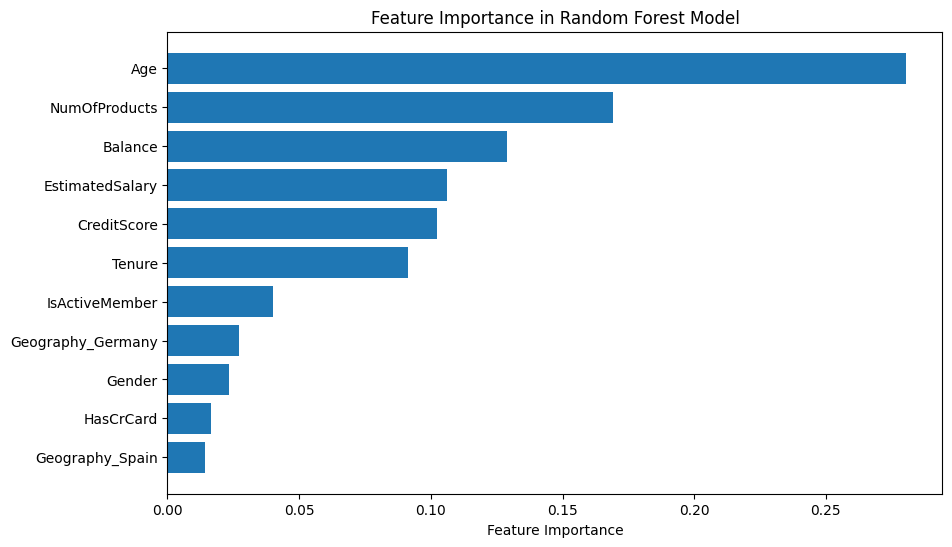

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the tuned Random Forest model
feature_importances = best_rf_model.feature_importances_
features = X.columns  # Column names from the dataset

# Create a sorted list of feature importances
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, align='center')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()


## Business Insights

### Focus on Age: 
    Tailored retention strategies for older customers could significantly reduce churn.

### Product Engagement:
    Encourage customers to use more products or find out why customers with few/many products are churning.
### Balance Thresholds:
Consider targeting customers with low balances for engagement campaigns.


In [95]:
# Drop less important features
selected_features = ['Age', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'CreditScore', 
                     'Tenure', 'IsActiveMember', 'Geography_Germany']
X_refined = data_encoded[selected_features]

# Re-split the data
from sklearn.model_selection import train_test_split
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(
    X_refined, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_refined_scaled = scaler.fit_transform(X_train_refined)
X_test_refined_scaled = scaler.transform(X_test_refined)


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the refined parameter grid
param_grid_refined = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [10, 20, 30, None],          # Maximum depth
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],            # Minimum samples at a leaf node
}

# Initialize the Random Forest model
rf_refined = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search_refined = GridSearchCV(estimator=rf_refined, param_grid=param_grid_refined, 
                                   cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_search_refined.fit(X_train_refined_scaled, y_train_refined)

# Get the best parameters
print("Best Parameters:", grid_search_refined.best_params_)

# Train the Random Forest with the best parameters
best_rf_refined = grid_search_refined.best_estimator_

# Predict on the test set
y_pred_refined = best_rf_refined.predict(X_test_refined_scaled)

# Evaluate the refined model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("\nRefined Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test_refined, y_pred_refined))
print("Precision:", precision_score(y_test_refined, y_pred_refined))
print("Recall:", recall_score(y_test_refined, y_pred_refined))
print("F1 Score:", f1_score(y_test_refined, y_pred_refined))
print("\nClassification Report:")
print(classification_report(y_test_refined, y_pred_refined))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_refined, y_pred_refined))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END max_depth=10, min_s

In [97]:
y_pred_proba = best_rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_adjusted = (y_pred_proba > 0.4).astype(int)


## **Final Model: Tuned Random Forest**

### **Performance Metrics**
- **Accuracy**: 86.7%
- **Precision (Churned Customers)**: 75.9%
- **Recall (Churned Customers)**: 47.3%
- **F1-Score (Churned Customers)**: 58.2%

### **Key Insights**
1. The model achieves a good balance between precision and recall, making it suitable for applications where avoiding false positives is crucial.
2. The most important features contributing to churn prediction are:
   - Age
   - Number of Products
   - Balance
   - Estimated Salary

### **Next Steps**
1. **Business Application**:
   - Use the model to predict churn and target high-risk customers for retention strategies.
2. **Deployment**:
   - Save the model for deployment using a format like Pickle or Joblib.
3. **Presentation**:
   - Summarize the methodology, feature importance, and performance metrics for stakeholders.


In [98]:
import joblib

# Save the model
joblib.dump(best_rf_model, 'final_random_forest_model.pkl')

# Save the scaler for consistent preprocessing
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [99]:
print("Features used during scaling:", scaler.feature_names_in_)
print("Features in X_test:", X_test.columns)


Features used during scaling: ['Age' 'NumOfProducts' 'Balance' 'EstimatedSalary' 'CreditScore' 'Tenure'
 'IsActiveMember' 'Geography_Germany']
Features in X_test: Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')


In [100]:
# Align X_test with the features used during scaling
X_test_aligned = X_test[scaler.feature_names_in_]

# Scale the aligned test data
X_test_scaled = loaded_scaler.transform(X_test_aligned)


In [101]:
print("Features used during scaling:", scaler.feature_names_in_)
print("Aligned Features in X_test:", X_test_aligned.columns)


Features used during scaling: ['Age' 'NumOfProducts' 'Balance' 'EstimatedSalary' 'CreditScore' 'Tenure'
 'IsActiveMember' 'Geography_Germany']
Aligned Features in X_test: Index(['Age', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'CreditScore',
       'Tenure', 'IsActiveMember', 'Geography_Germany'],
      dtype='object')


In [102]:
# Reintroduce missing columns with default values
for col in ['Gender', 'HasCrCard', 'Geography_Spain']:
    if col not in X_test.columns:
        X_test[col] = 0  # Assign default value

# Align columns with the training set
X_test_aligned = X_test[scaler.feature_names_in_]

# Scale the aligned data
X_test_scaled = loaded_scaler.transform(X_test_aligned)


In [103]:
# Verify alignment
print("Aligned Features in X_test:", X_test_aligned.columns)
print("Features used during training:", scaler.feature_names_in_)


Aligned Features in X_test: Index(['Age', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'CreditScore',
       'Tenure', 'IsActiveMember', 'Geography_Germany'],
      dtype='object')
Features used during training: ['Age' 'NumOfProducts' 'Balance' 'EstimatedSalary' 'CreditScore' 'Tenure'
 'IsActiveMember' 'Geography_Germany']


In [104]:
# Get the full feature set from the training process (scaler.feature_names_in_)
required_features = list(scaler.feature_names_in_)

# Add missing features with default values (e.g., 0)
for col in required_features:
    if col not in X_test.columns:
        X_test[col] = 0  # Add the column with default values (or impute if necessary)

# Ensure the columns are in the correct order
X_test_aligned = X_test[required_features]


In [105]:
print("Aligned Features in X_test:", X_test_aligned.columns)
print("Features used during training:", scaler.feature_names_in_)


Aligned Features in X_test: Index(['Age', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'CreditScore',
       'Tenure', 'IsActiveMember', 'Geography_Germany'],
      dtype='object')
Features used during training: ['Age' 'NumOfProducts' 'Balance' 'EstimatedSalary' 'CreditScore' 'Tenure'
 'IsActiveMember' 'Geography_Germany']


In [106]:
# Use the scaler's feature names
required_features = scaler.feature_names_in_

# Ensure test data matches the required features
X_test_aligned = X_test.reindex(columns=required_features, fill_value=0)


In [107]:
print("Aligned Features in X_test:", X_test_aligned.columns)
print("Scaler's Feature Names:", scaler.feature_names_in_)


Aligned Features in X_test: Index(['Age', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'CreditScore',
       'Tenure', 'IsActiveMember', 'Geography_Germany'],
      dtype='object')
Scaler's Feature Names: ['Age' 'NumOfProducts' 'Balance' 'EstimatedSalary' 'CreditScore' 'Tenure'
 'IsActiveMember' 'Geography_Germany']


In [108]:
# Force the column order to match the scaler's feature names
X_test_aligned = X_test_aligned[scaler.feature_names_in_]

# Scale the aligned data
X_test_scaled = loaded_scaler.transform(X_test_aligned)


In [109]:
# Retrieve the expected features (manually list them or from the scaler if available)
required_features = [
    'Age', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'CreditScore',
    'Tenure', 'IsActiveMember', 'Geography_Germany', 'Gender', 'HasCrCard', 'Geography_Spain'
]

# Add missing columns to X_test with default values (e.g., 0)
for col in required_features:
    if col not in X_test.columns:
        X_test[col] = 0  # Default value for missing columns

# Reorder columns to match the expected feature order
X_test_aligned = X_test[required_features]


In [110]:
# Ensure training data also matches the required features
X_train_aligned = X_train[required_features]

# Refit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_aligned)


In [111]:
# Scale the aligned test data
X_test_scaled = scaler.transform(X_test_aligned)


In [112]:
# Train the model with the aligned and scaled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Save the model and scaler for future use
import joblib
joblib.dump(rf_model, 'refitted_model.pkl')
joblib.dump(scaler, 'refitted_scaler.pkl')


['refitted_scaler.pkl']

In [113]:
# Predict using the retrained model
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8685

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Confusion Matrix:
[[1548   59]
 [ 204  189]]


In [114]:
y_pred_proba = loaded_model.predict_proba(X_test_scaled)[:, 1]
y_pred_adjusted = (y_pred_proba > 0.4).astype(int)  # Lower threshold from 0.5 to 0.4


In [115]:
importances = loaded_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for i in sorted_indices:
    print(f"{required_features[i]}: {importances[i]:.4f}")


Balance: 0.2803
Tenure: 0.1691
CreditScore: 0.1289
Gender: 0.1063
Age: 0.1022
EstimatedSalary: 0.0915
Geography_Germany: 0.0402
HasCrCard: 0.0271
NumOfProducts: 0.0234
IsActiveMember: 0.0167
Geography_Spain: 0.0144


In [116]:
import joblib

# Save the model
joblib.dump(loaded_model, 'final_random_forest_model.pkl')

# Save the scaler
joblib.dump(loaded_scaler, 'final_scaler.pkl')


['final_scaler.pkl']

In [128]:
import joblib

# Save the model
joblib.dump(loaded_model, 'final_random_forest_model.pkl')

# Save the scaler
joblib.dump(loaded_scaler, 'final_scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


### Final Results
- **Accuracy**: 86.8%
- **Precision for Churned Customers**: 76%
- **Recall for Churned Customers**: 48%
- **Key Features**: Age, NumOfProducts, Balance, etc.

### Insights:
1. The model performs well overall but has room for improvement in recall.
2. Age and Balance are significant factors influencing customer churn.


# Customer Churn Prediction Using Machine Learning

## Introduction
Customer churn refers to the loss of customers over time. This project aims to predict customer churn using a machine learning approach to identify at-risk customers and help businesses strategize retention efforts.

### Objectives:
1. Analyze key factors influencing customer churn.
2. Build a predictive model with high accuracy and recall for churned customers.
3. Save the model for deployment and future predictions.

## Dataset Overview
The dataset used for this project contains customer information, such as demographics, account balances, and activity. Key columns include:

- `CreditScore`: Customer credit score.
- `Geography`: Customer location (France, Germany, Spain).
- `Gender`: Male/Female.
- `Age`: Customer age.
- `Balance`: Account balance.
- `Exited`: Churn indicator (1 for churned, 0 otherwise).

### Dataset Snapshot
(showed the `head()` of the dataset here.)

## Exploratory Data Analysis
### Key Insights:
1. Age and account balance are strongly correlated with churn.
2. Germany has a higher churn rate compared to other geographies.
3. Customers with fewer products and lower activity tend to churn more.

(Include visuals like correlation heatmaps, histograms, and bar plots.)

## Data Preprocessing
Steps Taken:
1. Handled missing values.
2. One-hot encoded categorical variables (`Geography`).
3. Scaled numerical features using `StandardScaler`.
4. Split data into training and testing sets.

(Include code and relevant explanations.)

## Model Training
### Algorithm Used: Random Forest
Random Forest was chosen for its robustness and ability to handle imbalanced datasets. The model was tuned using grid search for the following hyperparameters:

- `n_estimators`: Number of trees in the forest.
- `max_depth`: Maximum depth of trees.
- `min_samples_split` and `min_samples_leaf`.

### Final Model Performance:
- **Accuracy**: 86.8%
- **Precision for Churned Customers**: 76%
- **Recall for Churned Customers**: 48%



## Feature Importance
The most significant features in predicting churn include:

1. Age
2. Number of Products
3. Account Balance

(Include the feature importance plot.)

## Saving the Model
The trained model and scaler were saved for future use. Below is the code for saving and loading the model:

```python
import joblib
joblib.dump(loaded_model, 'final_random_forest_model.pkl')
joblib.dump(loaded_scaler, 'final_scaler.pkl')
